In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
df = pd.read_json('/Users/sanket/Downloads/data-20240615T050002Z-001.zip')



In [16]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 26.9+ MB


In [18]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [19]:
# Drop the 'Id' column as it's not useful for prediction
df = df.drop(columns=['Id'])

In [20]:
# Encode categorical variables
le = LabelEncoder()
df['Married/Single'] = le.fit_transform(df['Married/Single'])
df['House_Ownership'] = le.fit_transform(df['House_Ownership'])
df['Car_Ownership'] = le.fit_transform(df['Car_Ownership'])
df['Profession'] = le.fit_transform(df['Profession'])
df['CITY'] = le.fit_transform(df['CITY'])
df['STATE'] = le.fit_transform(df['STATE'])


In [21]:
# Split the data into features and target
X = df.drop(columns=['Risk_Flag'])
y = df['Risk_Flag']


In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


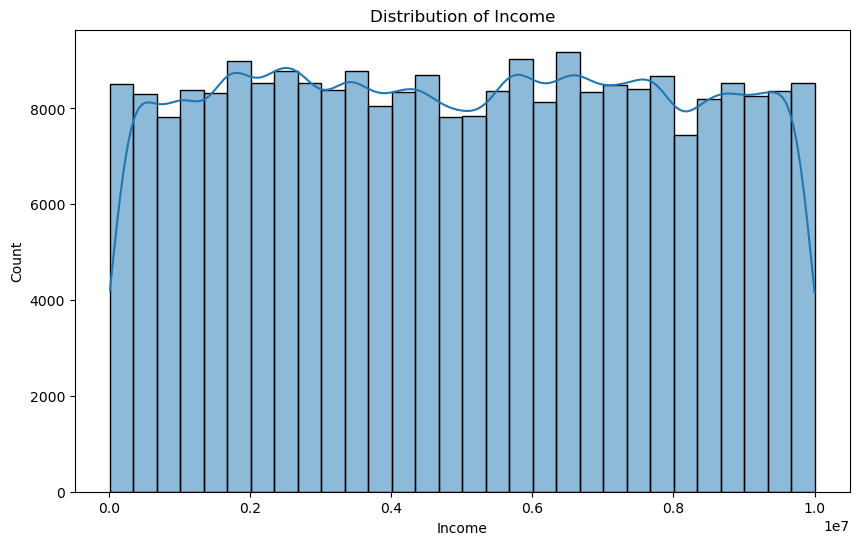

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Income
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.savefig('income_distribution.png')
plt.show()



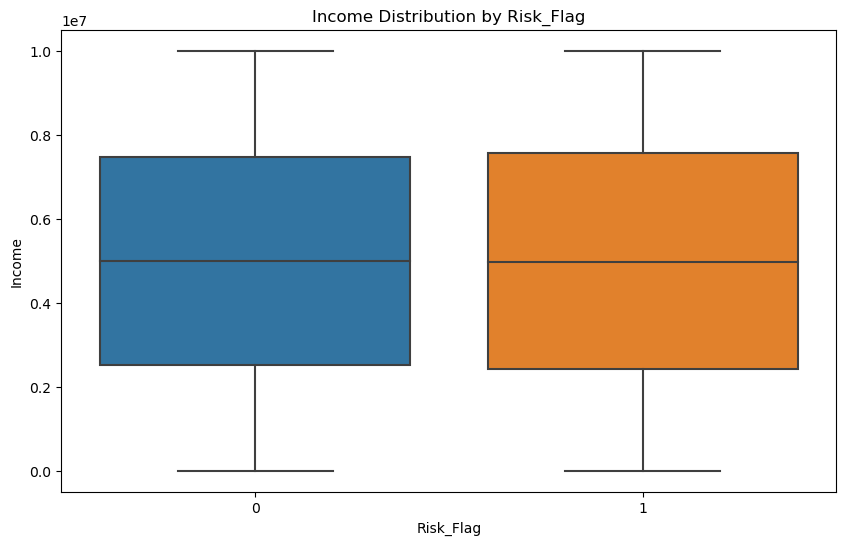

In [24]:
# Income Distribution by Risk_Flag
plt.figure(figsize=(10, 6))
sns.boxplot(x='Risk_Flag', y='Income', data=df)
plt.title('Income Distribution by Risk_Flag')
plt.xlabel('Risk_Flag')
plt.ylabel('Income')
plt.savefig('income_risk_boxplot.png')
plt.show()


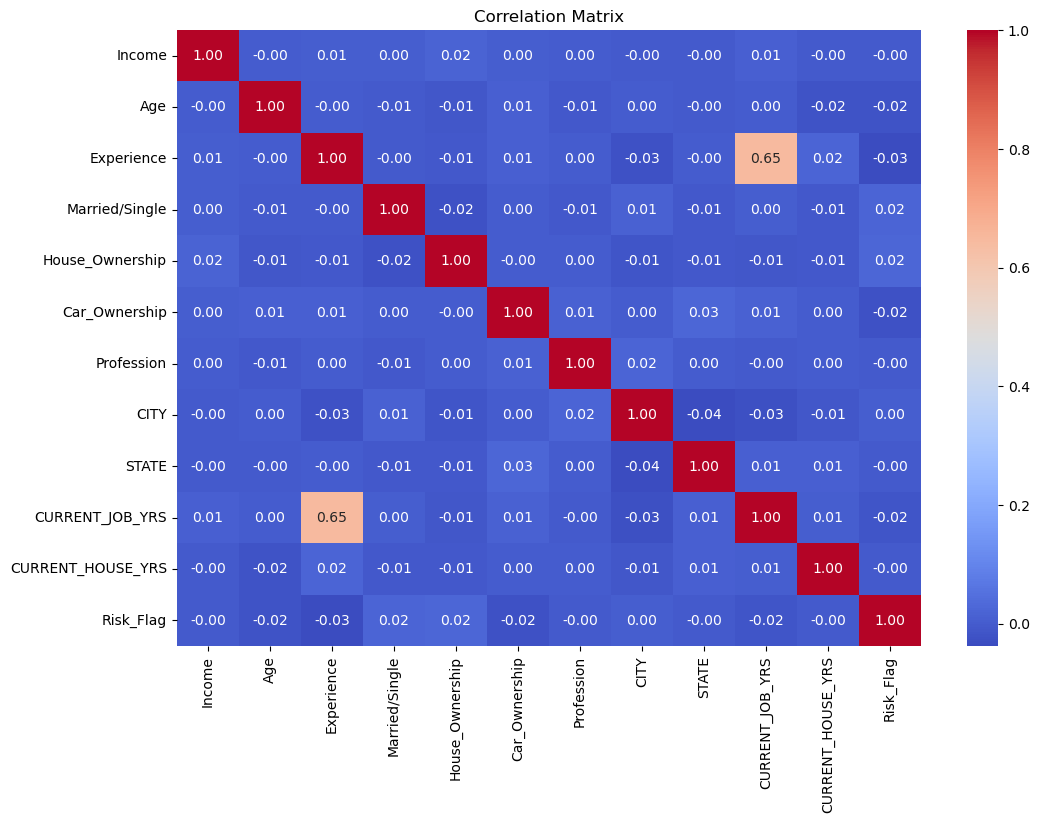

In [25]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

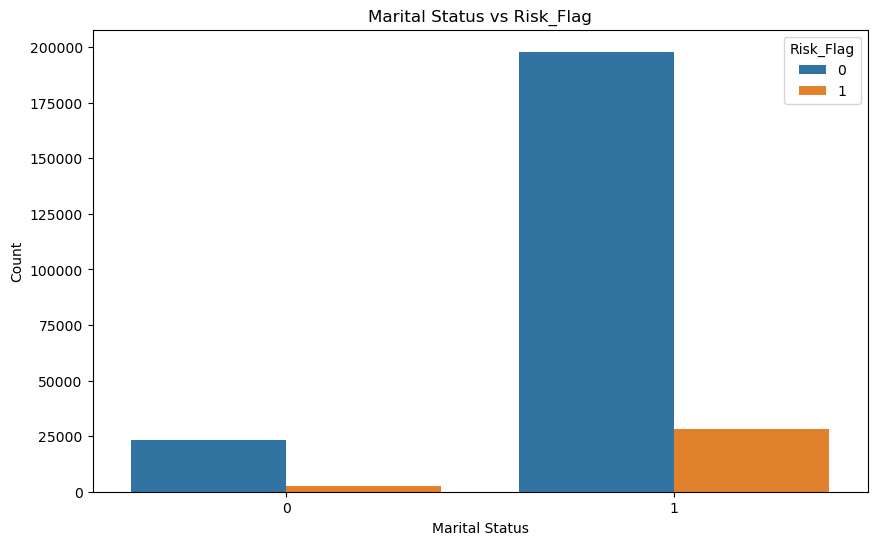

In [26]:
# Count plot for Married/Single
plt.figure(figsize=(10, 6))
sns.countplot(x='Married/Single', hue='Risk_Flag', data=df)
plt.title('Marital Status vs Risk_Flag')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Risk_Flag')
plt.savefig('marital_status_risk.png')
plt.show()

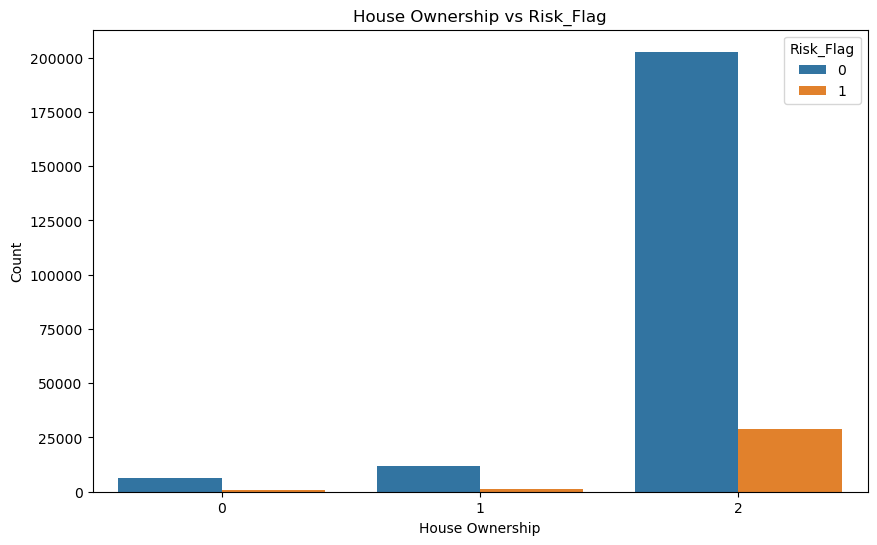

In [27]:
# Count plot for House_Ownership
plt.figure(figsize=(10, 6))
sns.countplot(x='House_Ownership', hue='Risk_Flag', data=df)
plt.title('House Ownership vs Risk_Flag')
plt.xlabel('House Ownership')
plt.ylabel('Count')
plt.legend(title='Risk_Flag')
plt.savefig('house_ownership_risk.png')
plt.show()

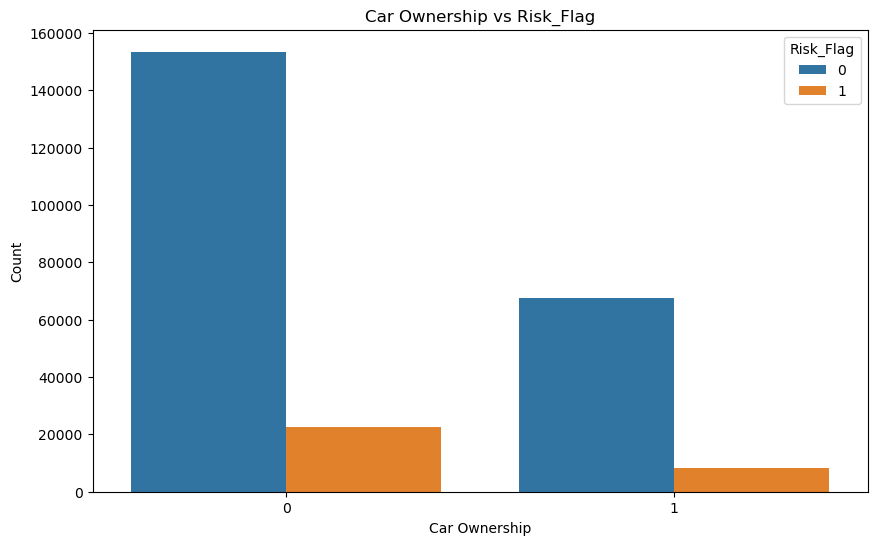

In [28]:
# Count plot for Car_Ownership
plt.figure(figsize=(10, 6))
sns.countplot(x='Car_Ownership', hue='Risk_Flag', data=df)
plt.title('Car Ownership vs Risk_Flag')
plt.xlabel('Car Ownership')
plt.ylabel('Count')
plt.legend(title='Risk_Flag')
plt.savefig('car_ownership_risk.png')
plt.show()

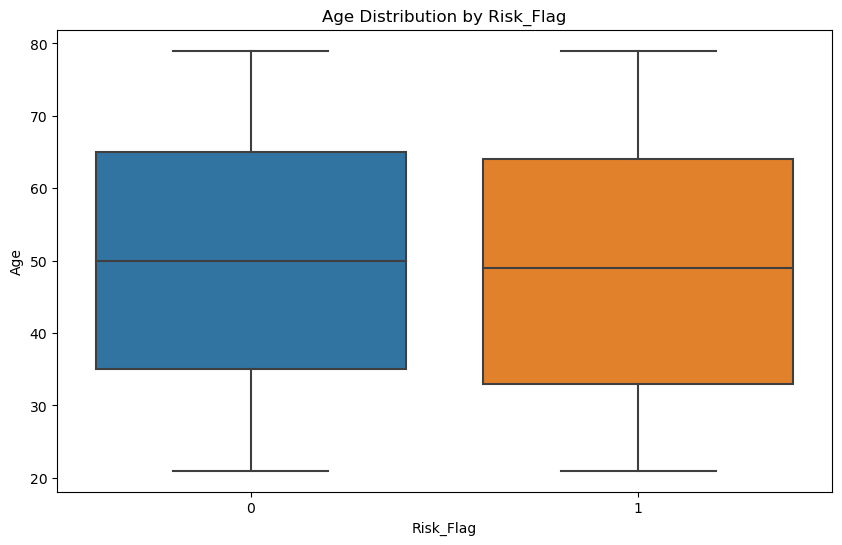

In [29]:
# Boxplot for Age vs Risk_Flag
plt.figure(figsize=(10, 6))
sns.boxplot(x='Risk_Flag', y='Age', data=df)
plt.title('Age Distribution by Risk_Flag')
plt.xlabel('Risk_Flag')
plt.ylabel('Age')
plt.savefig('age_risk_boxplot.png')
plt.show()


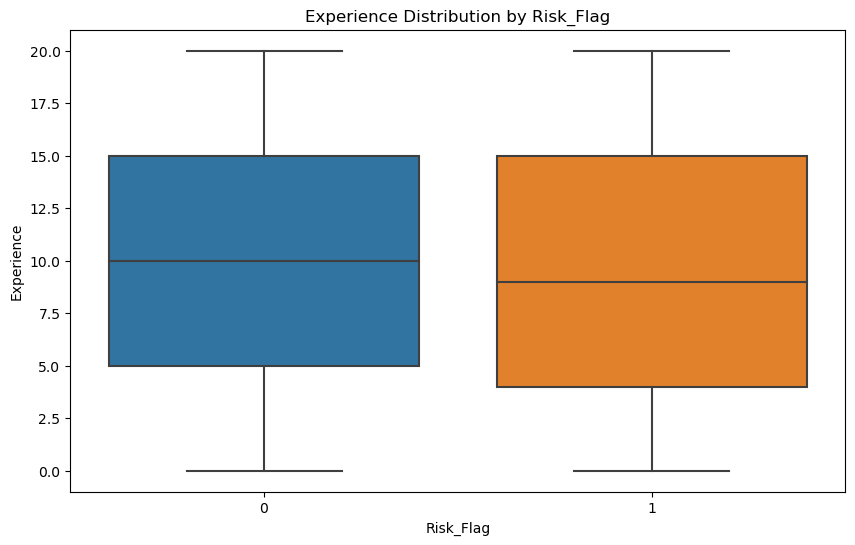

In [30]:
# Boxplot for Experience vs Risk_Flag
plt.figure(figsize=(10, 6))
sns.boxplot(x='Risk_Flag', y='Experience', data=df)
plt.title('Experience Distribution by Risk_Flag')
plt.xlabel('Risk_Flag')
plt.ylabel('Experience')
plt.savefig('experience_risk_boxplot.png')
plt.show()


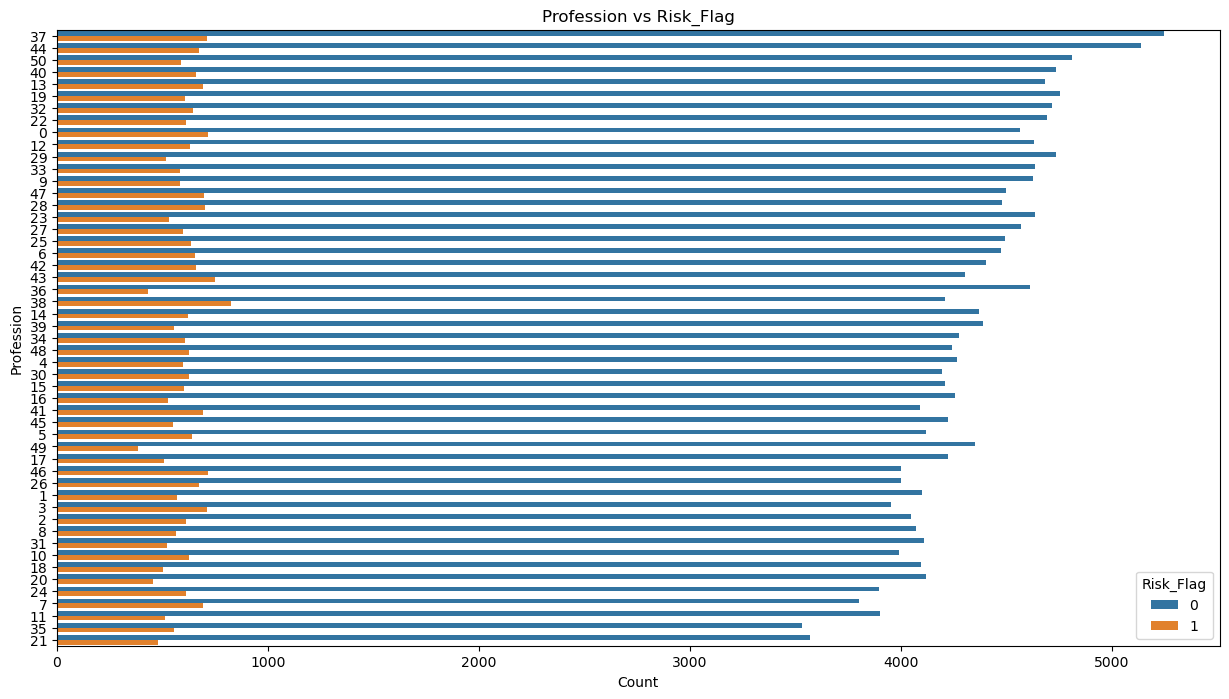

In [31]:
# Count plot for Profession
plt.figure(figsize=(15, 8))
sns.countplot(y='Profession', hue='Risk_Flag', data=df, order=df['Profession'].value_counts().index)
plt.title('Profession vs Risk_Flag')
plt.xlabel('Count')
plt.ylabel('Profession')
plt.legend(title='Risk_Flag')
plt.savefig('profession_risk.png')
plt.show()

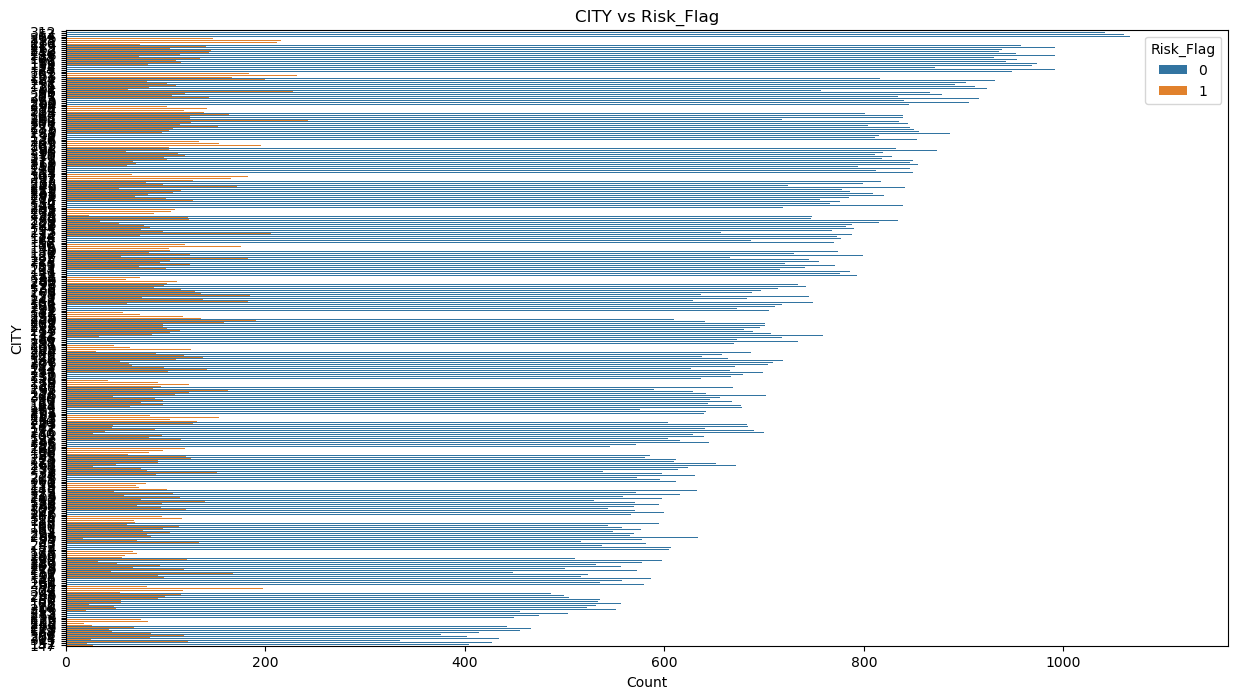

In [32]:
# Count plot for CITY
plt.figure(figsize=(15, 8))
sns.countplot(y='CITY', hue='Risk_Flag', data=df, order=df['CITY'].value_counts().index)
plt.title('CITY vs Risk_Flag')
plt.xlabel('Count')
plt.ylabel('CITY')
plt.legend(title='Risk_Flag')
plt.savefig('city_risk.png')
plt.show()


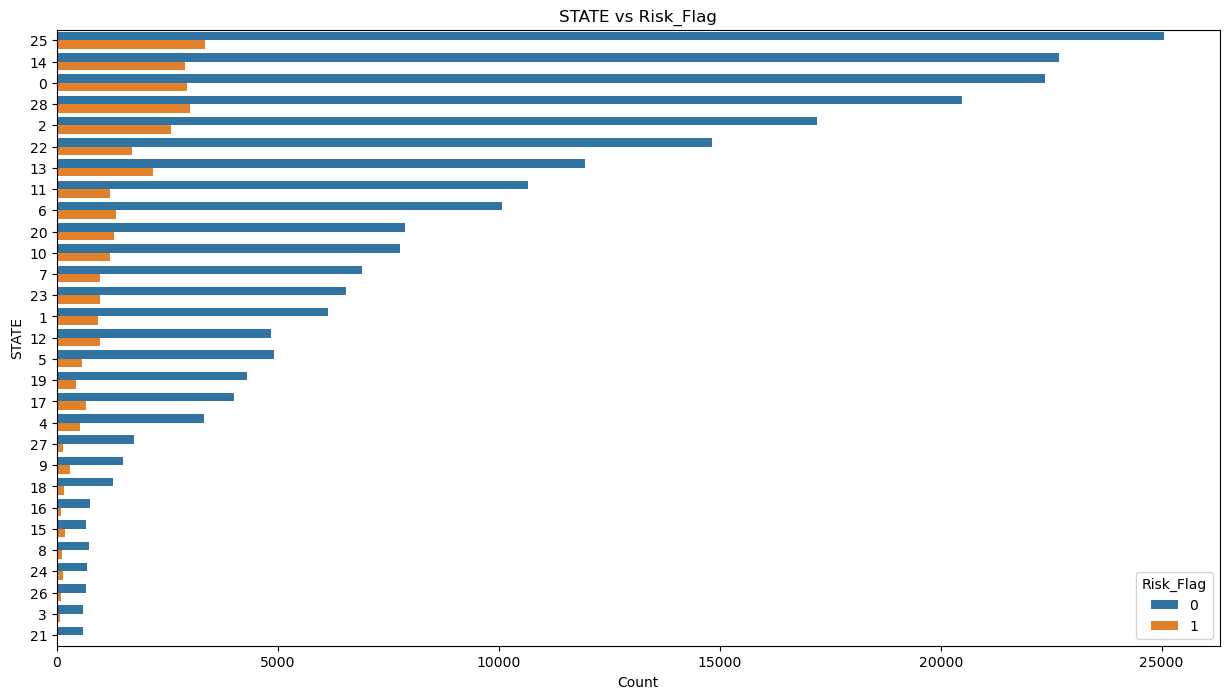

In [33]:
# Count plot for STATE
plt.figure(figsize=(15, 8))
sns.countplot(y='STATE', hue='Risk_Flag', data=df, order=df['STATE'].value_counts().index)
plt.title('STATE vs Risk_Flag')
plt.xlabel('Count')
plt.ylabel('STATE')
plt.legend(title='Risk_Flag')
plt.savefig('state_risk.png')
plt.show()


In [34]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]


In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)


Accuracy: 0.90
Confusion Matrix:
[[41937  2210]
 [ 2906  3347]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     44147
           1       0.60      0.54      0.57      6253

    accuracy                           0.90     50400
   macro avg       0.77      0.74      0.75     50400
weighted avg       0.89      0.90      0.90     50400



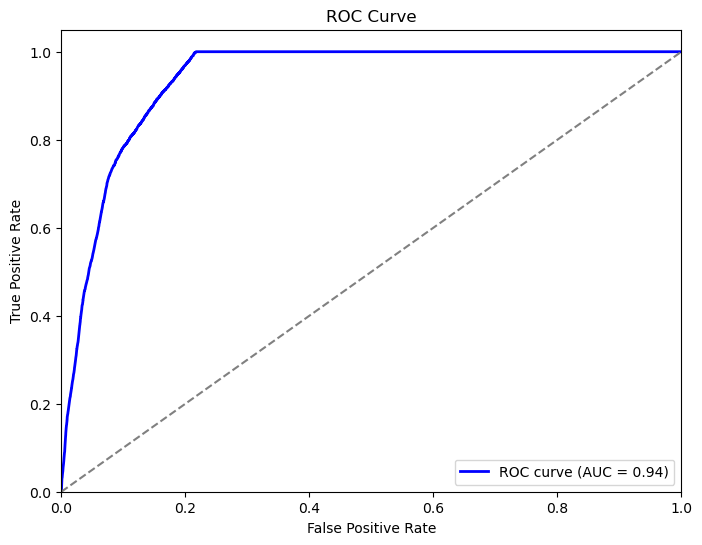

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig('roc_curve.png')
plt.show()


In [37]:
from fpdf import FPDF

# Create PDF report
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)

# Add a title page
pdf.add_page()
pdf.set_font("Arial", size=24)
pdf.cell(200, 10, txt="Loan Risk Prediction Report", ln=True, align='C')

# Add Introduction section
pdf.set_font("Arial", size=14)
pdf.ln(10)
pdf.cell(200, 10, txt="1. Introduction", ln=True)
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, txt=("This report provides an analysis of the loan risk prediction project. "
                            "The goal is to predict if a client is high risk or low risk for loan approval "
                            "based on their financial and demographic data."))

# Add Data Preprocessing section
pdf.ln(10)
pdf.set_font("Arial", size=14)
pdf.cell(200, 10, txt="2. Data Preprocessing", ln=True)
pdf.set_font("Arial", size=12)
preprocessing_text = (
    "The data preprocessing steps included encoding categorical variables and splitting the data into training and testing sets. "
    "The features were scaled, and the target variable was isolated for model training."
)
pdf.multi_cell(0, 10, txt=preprocessing_text)

# Add Data Exploration section
pdf.ln(10)
pdf.set_font("Arial", size=14)
pdf.cell(200, 10, txt="3. Data Exploration", ln=True)
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, txt=("The following visualizations provide insights into the distribution "
                            "and relationships between features."))

# Add visualizations
pdf.ln(5)
pdf.image('income_distribution.png', x=10, w=180)
pdf.ln(5)
pdf.image('income_risk_boxplot.png', x=10, w=180)
pdf.ln(5)
pdf.image('correlation_matrix.png', x=10, w=180)
pdf.ln(5)
pdf.image('marital_status_risk.png', x=10, w=180)
pdf.ln(5)
pdf.image('house_ownership_risk.png', x=10, w=180)
pdf.ln(5)
pdf.image('car_ownership_risk.png', x=10, w=180)
pdf.ln(5)
pdf.image('age_risk_boxplot.png', x=10, w=180)
pdf.ln(5)
pdf.image('experience_risk_boxplot.png', x=10, w=180)
pdf.ln(5)
pdf.image('profession_risk.png', x=10, w=180)
pdf.ln(5)
pdf.image('city_risk.png', x=10, w=180)
pdf.ln(5)
pdf.image('state_risk.png', x=10, w=180)

# Add Model Building and Training section
pdf.add_page()
pdf.set_font("Arial", size=14)
pdf.cell(200, 10, txt="4. Model Building and Training", ln=True)
pdf.set_font("Arial", size=12)
model_text = (
    "A Random Forest classifier was used for model building. The model was trained on the training set, and predictions were made on the test set."
)
pdf.multi_cell(0, 10, txt=model_text)

# Add Model Evaluation section
pdf.ln(10)
pdf.set_font("Arial", size=14)
pdf.cell(200, 10, txt="5. Model Evaluation", ln=True)
pdf.set_font("Arial", size=12)
evaluation_text = (
    "The model performance is evaluated using various metrics such as accuracy, confusion matrix, and ROC curve."
)
pdf.multi_cell(0, 10, txt=evaluation_text)

# Add performance metrics
pdf.ln(5)
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, txt=f"Accuracy: {accuracy:.2f}", ln=True)
pdf.ln(5)
pdf.cell(200, 10, txt="Confusion Matrix:", ln=True)
pdf.ln(5)
pdf.set_font("Arial", size=10)
conf_matrix_text = '\n'.join(['\t'.join(map(str, row)) for row in conf_matrix])
pdf.multi_cell(0, 10, txt=conf_matrix_text)
pdf.ln(5)
pdf.cell(200, 10, txt="Classification Report:", ln=True)
pdf.ln(5)
pdf.set_font("Arial", size=10)
pdf.multi_cell(0, 10, txt=class_report)

# Add ROC Curve
pdf.ln(5)
pdf.image('roc_curve.png', x=10, w=180)

# Save the PDF
pdf.output("Loan_Risk_Prediction_Report.pdf")


''